## Final Project Submission

Please fill out:
* Student name: Matthew Parker
* Student pace: full time
* Scheduled project review date/time: ????
* Instructor name: Rafael Carrasco
* Blog post URL: ????


# Importing and Inspecting

In [157]:
#let's just go ahead and import every python library in existence....just in case  :-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math
# plt.style.use('seaborn')

In [158]:
#reading the .csv file into a pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [159]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It appears that two of our columns have values stored as strings. Also, three columns are missing some data.

# Cleaning the data

Check all columns for placeholders, duplicates, or other atypical values.

In [161]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

According to the reports above, we have several odd things going on:
1. There is a duplicate row in the "id" column at "795000620"
2. Over half of the "sqft_basement" column is "0.0"; additionally, 21% of all values are "?" placeholders; furthermore, the column's datatype is string instead of numeric
3. The "waterfront" column is over 99% "0.0"; this column is also missing 2,376 values (~11% of total)
4. The vast majority (90%) of values in the "view" column are "0.0"; this is in addition to 63 missing values
5. The "yr_renovated" column is 95.8% "0.0"; this column is also missing 3,842 values (~17.8% of total)

Let's deal with these one at a time, beginning with the duplicate instance of "795000620". Let's display both instances to make sure that they contain the same data.

### Dealing with duplicates

In [162]:
df.loc[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


So it turns out that this house was sold several times over the span of a few months. This is fine, but notice that some of the columns have missing values (like 'waterfront' and 'yr_renovated'). We should probably check to make sure that the rest of the dataset doesn't have any instances of duplicates where missing values can be filled in.

In [163]:
# since we're about to slice out scattered rows, we should create a 
# new column that duplicates the original index. This will make
# merging the sliced data back in much easier later on.
df = df.reset_index()

In [164]:
duplicates = df[df.duplicated(subset='id', keep=False)]

# How many duplicates do we have?
print(len(duplicates))

353


In [165]:
# let's see if there are any houses which *only* have NaN values for 'waterfront'
duplicates.loc[duplicates['waterfront']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
824,824,726049190,2/18/2015,431000.0,3,1.00,1810,7200,1.0,NaN,...,7,1130,680.0,1954,0.0,98133,47.7493,-122.351,1810,8100
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
10261,10261,1450100390,9/5/2014,125000.0,3,1.00,920,7314,1.0,NaN,...,6,920,0.0,1960,0.0,98002,47.2892,-122.220,1010,7420
4868,4868,1524079093,3/18/2015,369500.0,3,1.75,1300,20700,1.0,NaN,...,7,1300,0.0,1962,0.0,98024,47.5587,-121.904,1930,37638
5718,5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,...,6,840,0.0,1959,0.0,98023,47.3281,-122.343,840,9324
3536,3536,1823049202,6/10/2014,175000.0,6,1.50,1930,8400,1.0,NaN,...,7,1030,900.0,1971,0.0,98146,47.4869,-122.340,1780,9520
3947,3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
19195,19195,1901600090,4/26/2015,390000.0,5,1.75,1940,6654,1.5,NaN,...,7,1940,0.0,1953,0.0,98166,47.4663,-122.359,2300,9500
1862,1862,2143700830,10/6/2014,207000.0,4,2.50,2100,19680,1.5,NaN,...,6,2100,0.0,1914,0.0,98055,47.4787,-122.230,1340,12300


In [166]:
# let's see if there are any houses which *only* have NaN values for 'yr_renovated'
duplicates.loc[duplicates['yr_renovated']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16801,16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
12406,12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
14841,14841,324000530,7/8/2014,201500.0,3,1.00,1320,5000,1.5,0.0,...,7,1320,0.0,1912,NaN,98116,47.5711,-122.386,1320,4179
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
12422,12422,1217000340,6/6/2014,185000.0,3,1.00,1840,8100,1.0,0.0,...,7,920,920.0,1953,NaN,98166,47.4550,-122.350,1250,8100
8497,8497,1237500540,12/22/2014,270000.0,3,1.75,1370,10866,1.0,0.0,...,6,1370,0.0,1945,NaN,98052,47.6774,-122.164,1580,14250
3752,3752,1254200015,12/16/2014,405000.0,3,2.50,2260,5500,1.5,0.0,...,7,1280,980.0,1910,NaN,98117,47.6810,-122.388,1790,5355
14560,14560,1432400120,11/11/2014,165000.0,3,1.00,1010,7690,1.0,0.0,...,6,1010,0.0,1958,NaN,98058,47.4501,-122.176,1010,7619
10262,10262,1450100390,3/16/2015,208000.0,3,1.00,920,7314,1.0,0.0,...,6,920,0.0,1960,NaN,98002,47.2892,-122.220,1010,7420
4867,4867,1524079093,8/27/2014,275000.0,3,1.75,1300,20700,1.0,0.0,...,7,1300,0.0,1962,NaN,98024,47.5587,-121.904,1930,37638


So looking at the duplicated data, it seems that we would be safe to convert all 'waterfront' NaN values to '0.0', except for *id*'s '2212200100', '5054800110', and '5249801440' (which only have NaN values in both instances). The same is true for all 'yr_renovated' NaN values except for *id*'s '1922059278', '1954420170', '3262300940', '4222310010', and '7972000010'.

So, first we will remove the seven pairs of rows just mentioned since we cannot reliably fill in any missing data. Then, let's replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'. Finally, we will merge the *duplicates* DataFrame back into the original *df* DataFrame so that our changes are updated to the original.

In [167]:
# change index to 'id' so that we can tell pandas which rows to remove
duplicates = duplicates.set_index('id')
duplicates.drop([2212200100, 5054800110, 5249801440, 1922059278, 1954420170, 
                 3262300940, 4222310010, 7972000010], inplace=True)

# now reset the index to preserve the 'id' column, then set the index back
# to 'index' for merging with the original DataFrame
duplicates = duplicates.reset_index()
duplicates = duplicates.set_index('index')

In [168]:
# now replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'
duplicates.waterfront.fillna(0, inplace=True)
duplicates.yr_renovated.fillna(0, inplace=True)

In [169]:
# Now let's merge the duplicates DataFrame back into the original.
# first set df's index back to 'index' as it originally was.
df.set_index('index', inplace=True)
df.update(duplicates, overwrite=True)

# because pandas converts all integers to floats in an update, we need to set them back
df = df.astype({'id': 'int64', 'bedrooms': 'int64', 'sqft_living': 'int64', 'sqft_lot': 'int64', 
                  'condition': 'int64', 'grade': 'int64', 'sqft_above': 'int64', 'yr_built': 'int64', 
                  'zipcode': 'int64', 'sqft_living15': 'int64', 'sqft_lot15': 'int64'})

Alright, that's 1 down, only 4 more weird features to go. 

### Changing datatypes 

Let's tackle the problematic "sqft_basement" column next. First, we'll turn all the "?" values into NaN values. Then we'll convert the entire column into numeric data using the *.to_numeric* method.

In [170]:
# we define a function that will replace all "?" values with NaN
def impute_sqft_basement(value):
    if value == '?':
        return None
    else:
        return value


# now we map a lamba function to iterate the above "impute" function through
# the *sqft_basement* column
df.sqft_basement = df.sqft_basement.map(lambda x: impute_sqft_basement(x))

In [171]:
# and now we will change the data type to numeric
df.sqft_basement = pd.to_numeric(df.sqft_basement)

Okay, that's another weird column dealt with. 

Since we only have one year's worth of data, we cannot make any solid predictions as to how the time of year might impact the price of a house, so we'll drop the *date* column. The *id* is also no longer useful, so we'll drop it as well.

In [172]:
df_subset = df
df_subset.drop(['date','id'], axis=1, inplace=True)

### Missing values

There are only a few missing values for *view*, so we'll just drop those rows. 

In [173]:
df_subset.dropna(subset=['view'], inplace=True)

OK, now on to the missing values in *sqft_basement* to contend with. About 60% of the properties have no basement and there are 454 NaN values. Intuitively, it seems like the presence/absence of a basement is likely to impact the sale price of a home, so instead of dropping the column let's just drop the rows with NaN values instead. This is only 2% of our dataset, so our model should not be significantly effected.

Furthermore, since any values for *sqft_basement* should just be the difference between *sqft_living* and *sqft_above* (or close to it), the actual values in this column are not as important. Since over half of the houses don't have a basement anyway, let's turn this column into a categorical one that just tells us whether or not a house has a basement at all.

In [174]:
# getting rid of NaN values
df_subset.dropna(subset=['sqft_basement'], inplace=True)

In [ ]:
# changing all positive values to "1"
# we can just reuse and slightly change our 'impute' function from above
def impute_sqft_basement_again(value):
    if value > 0:
        return 1
    else:
        return value


df_subset.sqft_basement = df_subset.sqft_basement.map(lambda x: impute_sqft_basement_again(x))

# rename the column to make it more informative
# and also make it an integer instead of a float
df_subset.rename(columns={'sqft_basement':'basement'}, inplace=True)
df_subset = df_subset.astype({'basement': 'int64'})

As for *waterfront* and *yr_renovated*, we've got a **lot** of missing data. Since well over 90% of the values for both columns are of a single value, we'll just fill in NaNs with those values (0). Though this might slightly skew the results, it is such a small percentage that it should not make a huge impact in the long run.

In [175]:
df_subset[np.isnan(df_subset)] = 0

Now that we've cleaned our data and eliminated all NaN values, we are able to run our first OLS on our dataset, mostly just to get a rough idea of how everything is working together.

In [176]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop(['price'], axis=1)

# now establish a constant for our model
X = sm.add_constant(x)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2896.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        11:36:39   Log-Likelihood:            -2.8732e+05
No. Observations:               21082   AIC:                         5.747e+05
Df Residuals:                   21064   BIC:                         5.748e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.21e+06   2.96e+06      2.437      0.015    1.41e+06     1.3e+07
bedrooms      -3.583e+04   1920.875    -18.654      0.000   -3.96e+04   -3.21e+04
bathrooms      4.068e+04   3297.436     12.336      0.000    3.42e+04    4.71e+04
sqft_living     109.9727      2.298     47.847      0.000     105.468     114.478
sqft_lot          0.1152      0.049      2.361      0.018       0.020       0.211
floors         7255.8217   3639.942      1.993      0.046     121.256    1.44e+04
waterfront     6.024e+05   1.84e+04     32.721      0.000    5.66e+05    6.38e+05
view           5.546e+04   2144.583     25.859      0.000    5.13e+04    5.97e+04
condition      2.689e+04   2368.419     11.353      0.000    2.22e+04    3.15e+04
grade          9.655e+04   2180.052     44.287      0.000    9.23e+04    1.01e+05
sqft_above       70.7140      2.273     31.113      0.000      66.259      75.169
sqft_basement    39.2652      2.677     14.668      0.000      34.018      44.512
yr_built      -2627.8049     72.747    -36.123      0.000   -2770.394   -2485.216
yr_renovated     24.1418      4.024      6.000      0.000      16.255      32.028
zipcode        -591.2091     33.315    -17.746      0.000    -656.509    -525.909
lat            6.015e+05   1.08e+04     55.479      0.000     5.8e+05    6.23e+05
long          -2.181e+05   1.33e+04    -16.410      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.7793      3.478      6.263      0.000      14.963      28.596
sqft_lot15       -0.3809      0.075     -5.109      0.000      -0.527      -0.235
==============================================================================
Omnibus:                    17793.513   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1768745.417
Skew:                           3.527   Prob(JB):                         0.00
Kurtosis:                      47.315   Cond. No.                     6.06e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.81e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Variable Correlation and Feature Selection


Now that our data has been sufficiently cleaned, let's get a look at our variables and whether they might be related.

*Warning*: this will take a while to compute due to the size of the data set.


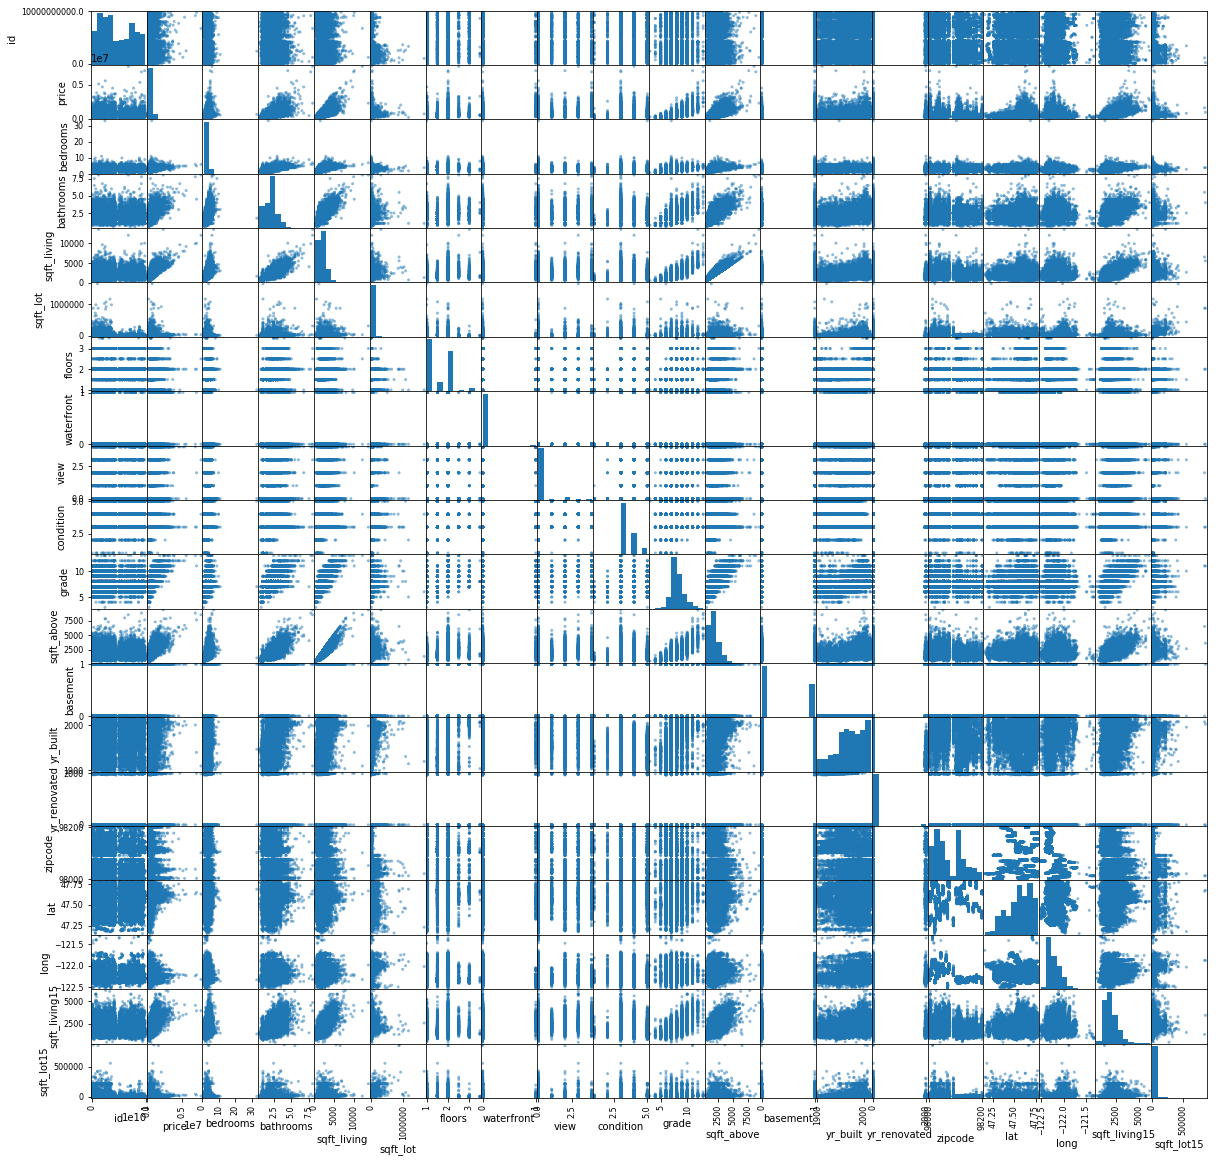

In [115]:
# let's use a scatter matrix to take a quick look at the variables
# end code line with a semicolon so that only the graph is displayed
pd.plotting.scatter_matrix(df_subset, figsize=(20,20));

Wow, that's a lot of tiny graphs! But we can immediately discern a few important characteristics:
1. We seem to have several variables with categorical data: *floors*, *condition*, and *grade* for sure. Logically, *bathrooms* and *bedrooms* would also be categorical, but it seems we may have an outlier in *bedrooms* and *floors*.
2. Looking at the relations with the *price* variable, we have several candidates for linear relationships: *bedrooms*, *bathrooms*, *sqft_living*, *sqft_above*, and *sqft_living15*
3. Heavily left-skewed distribution: *price*, *bedrooms*, *sqft_living*, *sqft_above*, *sqft_living15*, *long*
4. somewhat normally distributed: *bathrooms*, *grade*
5. *zipcode* shows a rather random distribution, so we can probably safely drop it

Let's check out our potentially categorical variables more closely for outliers.

In [177]:
df_subset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [180]:
# cats = ['floors','condition', 'grade', 'bathrooms', 'bedrooms','zipcode','sqft_basement','waterfront','view']

cats = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']
for cat in cats:
    print(df_subset[cat].value_counts(normalize=False))

3     9607
4     6724
2     2685
5     1555
6      260
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5242
1.00    3748
1.75    2978
2.25    2005
2.00    1882
1.50    1418
2.75    1160
3.00     735
3.50     718
3.25     570
3.75     152
4.00     135
4.50      96
4.25      77
0.75      71
4.75      23
5.00      19
5.25      13
1.25       9
5.50       9
6.00       5
5.75       4
0.50       3
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
1.0    10427
2.0     8043
1.5     1858
3.0      593
2.5      154
3.5        7
Name: floors, dtype: int64
0.0    20941
1.0      141
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
3    13688
4     5538
5     1662
2      166
1       28
Name: condition, dtype: int64
7     8762
8     5922
9     2546
6     1991
10    1108
11     389
5      235
12      88
4      

#### Outliers

Wow, so it seems like most of these categories have some extreme outliers. We can probably drop any category that appears less than around 20 times.

In [181]:
# dropping grade outliers
indexNames = df_subset[df_subset['grade'] == 13 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['grade'] == 3 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bedroom outliers
indexNames = df_subset[df_subset['bedrooms'] >= 8 ].index
df_subset.drop(indexNames , inplace=True)

#### Dropping *price* outliers

We should also get rid of the crazy-expensive houses. Let's try keeping everything within 7 standard deviations of the mean (so as not to eliminate *too* much data.

In [182]:
print('mean = ', df_subset.price.mean())
print('std = ', df_subset.price.std())
up_lim = (df_subset.price.mean() + (7*df_subset.price.std()))
print('upper limit of our concern = ', up_lim)

mean =  537808.0662421592
std =  354679.76562106196
upper limit of our concern =  3020566.425589593


In [183]:
# dropping price outliers based on our upper limit
indexNames = df_subset[df_subset['price'] > up_lim].index
df_subset.drop(indexNames , inplace=True)

### Taking a closer look at *floors* and *bathrooms*
We know that *floors* and *bathrooms* exhibit some weird chunkiness, but let's take a closer look at their distributions. 

Text(0.5, 1.0, 'bathrooms')

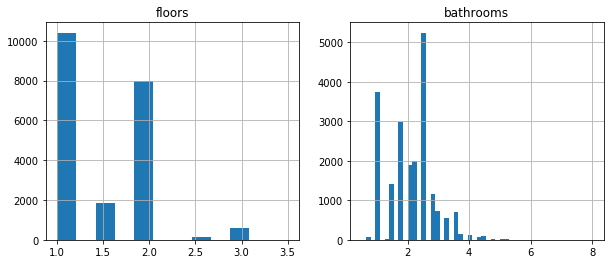

In [184]:
# plotting two histograms
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
df_subset.floors.hist(bins=12)
ax1.set_title("floors")

ax2 = plt.subplot(1,2,2)
df_subset.bathrooms.hist(bins=50)
ax2.set_title('bathrooms')

Gross. We need to clean that up a little bit.

Since there are a lot of half and quarter (just sinks? just toilets? just showers?) bathrooms, we'll just round every value down to an integer (1.75 intentionally rounds down to 1). It's just a hunch, but it seems like the number of full bathrooms might be more important than the number of partial bathrooms.

We'll go through a similar routine for *floors*, but this time we'll round everything up (1.5 rounds up to 2). Again, just a hunch, but this is based on the assumption that potential buyers would assign similar weights to both full- and half-flights of stairs.

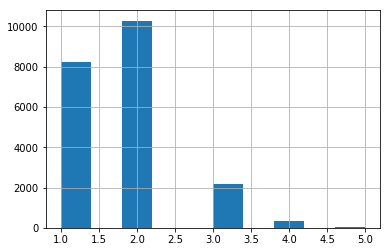

In [185]:
#grouping bathrooms
new_bath = []
for i in df_subset.bathrooms:
    if i >= 1:
        new_bath.append(math.trunc(i))
    else:
        new_bath.append(1)    
df_subset.bathrooms = new_bath

#now to group the outliers into the largest category
def impute_baths(value):
    if value > 5:
        return 5
    else:
        return value


df_subset.bathrooms = df_subset.bathrooms.map(lambda x: impute_baths(x))
df_subset.bathrooms.hist();

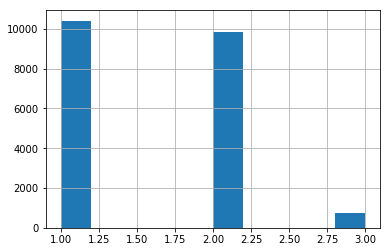

In [186]:
#grouping floors
new_floor = []
for i in df_subset.floors:
    new_floor.append(math.ceil(i))
df_subset.floors = new_floor

#now to group the outliers into the largest category
def impute_floors(value):
    if value > 3:
        return 3
    else:
        return value


df_subset.floors = df_subset.floors.map(lambda x: impute_floors(x))
df_subset.floors.hist();

### Looking at variable correlation

Now that we've seen that several of the variables display relationships, and that several independent variables might be related, let's use a correlation heatmap to filter out which ones are related the closest.

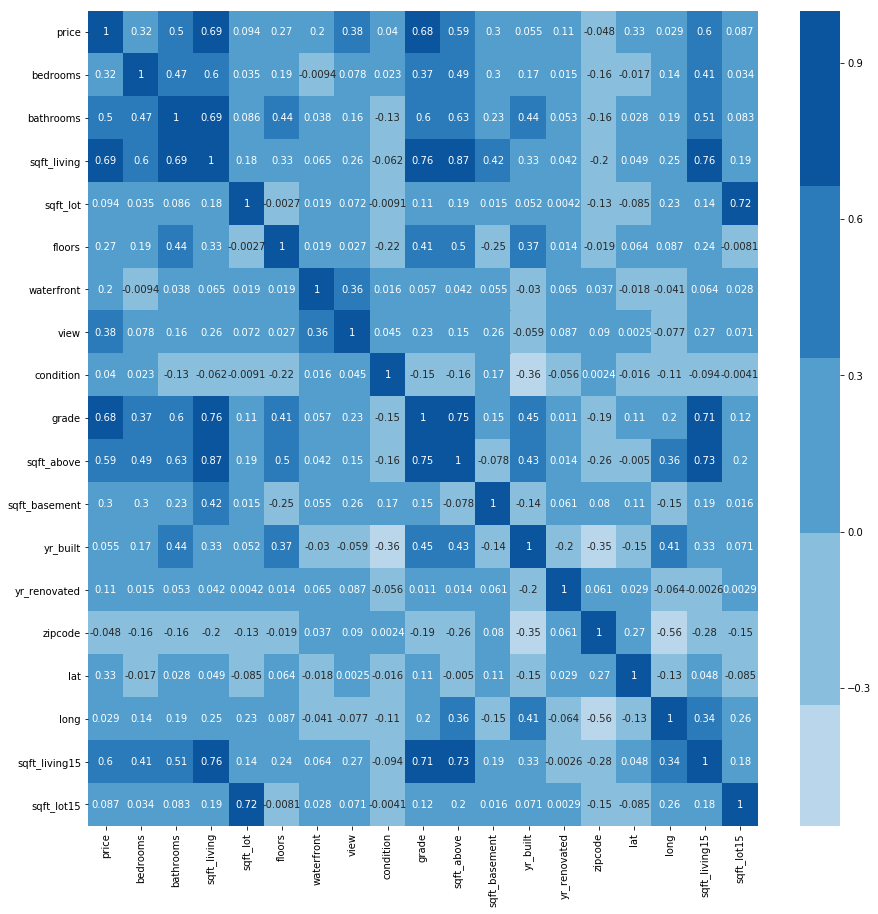

In [187]:
plt.figure(figsize=(15,15))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

Alright, it looks like we have a lot of variables that are not well-correlated to *price*. Let's iterate through 1:1 OLS models to see which ones have the best R-squared and p-value scores.

In [97]:
# defining the function
def ols_iterate(y, x_list, dataset):
    """
    This function iterates through 1:1 OLS model summaries using
    an input target variable and a list of independent variables.
    --------------------
    y = target column name (ex: ['target'])
    x = list of DataFrame columns (ex: ['var1','var2','var3'])
    dataset = name of pd.DataFrame (ex: df)
    
    """
    listed = []
    for i in x_list:
        item = []
        x = dataset[i]
        X = sm.add_constant(x)
        linreg = sm.OLS(dataset[y], X).fit()
        item = [i, round(linreg.rsquared, 4), round(linreg.pvalues[1], 4)]
        listed.append(item)
        print('for ',i,' : \nr-squared = ',round(linreg.rsquared,4),'\np-values = ',round(linreg.pvalues[1],4),'\n')
    return listed

In [98]:
ols_iterate('price', lerst, df_subset)

for  bedrooms  : 
r-squared =  0.103 
p-values =  0.0 

for  bathrooms  : 
r-squared =  0.2462 
p-values =  0.0 

for  sqft_living  : 
r-squared =  0.4787 
p-values =  0.0 

for  sqft_lot  : 
r-squared =  0.0077 
p-values =  0.0 

for  floors  : 
r-squared =  0.0773 
p-values =  0.0 

for  waterfront  : 
r-squared =  0.0391 
p-values =  0.0 

for  view  : 
r-squared =  0.14 
p-values =  0.0 

for  condition  : 
r-squared =  0.0017 
p-values =  0.0 

for  grade  : 
r-squared =  0.4577 
p-values =  0.0 

for  sqft_above  : 
r-squared =  0.3582 
p-values =  0.0 

for  basement  : 
r-squared =  0.0308 
p-values =  0.0 

for  yr_built  : 
r-squared =  0.0028 
p-values =  0.0 

for  yr_renovated  : 
r-squared =  0.0132 
p-values =  0.0 

for  zipcode  : 
r-squared =  0.002 
p-values =  0.0 

for  lat  : 
r-squared =  0.1137 
p-values =  0.0 

for  long  : 
r-squared =  0.0008 
p-values =  0.0004 

for  sqft_living15  : 
r-squared =  0.3603 
p-values =  0.0 

for  sqft_lot15  : 
r-squared =  

[['bedrooms', 0.103, 0.0],
 ['bathrooms', 0.2462, 0.0],
 ['sqft_living', 0.4787, 0.0],
 ['sqft_lot', 0.0077, 0.0],
 ['floors', 0.0773, 0.0],
 ['waterfront', 0.0391, 0.0],
 ['view', 0.14, 0.0],
 ['condition', 0.0017, 0.0],
 ['grade', 0.4577, 0.0],
 ['sqft_above', 0.3582, 0.0],
 ['basement', 0.0308, 0.0],
 ['yr_built', 0.0028, 0.0],
 ['yr_renovated', 0.0132, 0.0],
 ['zipcode', 0.002, 0.0],
 ['lat', 0.1137, 0.0],
 ['long', 0.0008, 0.0004],
 ['sqft_living15', 0.3603, 0.0],
 ['sqft_lot15', 0.0066, 0.0]]

The variables with the highest R-squared scores are: *bathrooms*, *sqft_living*, *grade*, *sqft_above*, and *sqft_living15*. These line up perfectly with our heatmap as the only values that had a 50% or greater correlation with *price*. So let's drop ***all*** of the variables except for these five. We'll also hang on to *lat* and *long* for now, but this is just for fun.

In [103]:
df_subset = df_subset[['price','bathrooms', 'sqft_living', 
                       'grade','sqft_above', 'lat', 'long', 'sqft_living15']]

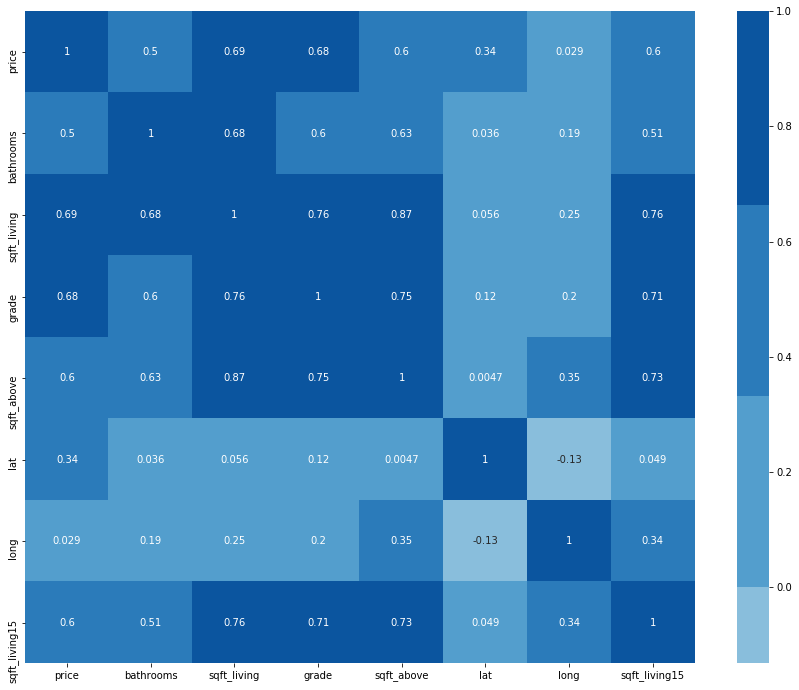

In [105]:
# cleaned up heatmap again
plt.figure(figsize=(15,12))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

We also seem to have numerous candidates for multicolinearity. Rather than addressing them all right now, let's see if we can pare down our list of variables first. Use *statsmodels* to see which variables have the highest *p-values*.

In [197]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop(['price'], axis=1)

# now establish a constant for our model
X = sm.add_constant(x)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        11:46:33   Log-Likelihood:            -2.6349e+05
No. Observations:               19487   AIC:                         5.270e+05
Df Residuals:                   19470   BIC:                         5.271e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.137e+07   2.73e+06      4.170      0.000    6.03e+06    1.67e+07
bedrooms      -2.948e+04   1886.200    -15.631      0.000   -3.32e+04   -2.58e+04
bathrooms      4.619e+04   2756.265     16.760      0.000    4.08e+04    5.16e+04
sqft_living      86.3351      2.156     40.053      0.000      82.110      90.560
sqft_lot          0.0478      0.073      0.655      0.512      -0.095       0.191
floors         1.858e+04   2980.301      6.234      0.000    1.27e+04    2.44e+04
waterfront     4.647e+05   1.91e+04     24.391      0.000    4.27e+05    5.02e+05
view           5.891e+04   2058.729     28.616      0.000    5.49e+04    6.29e+04
condition      2.933e+04   2187.922     13.406      0.000     2.5e+04    3.36e+04
grade           1.03e+05   2037.596     50.540      0.000     9.9e+04    1.07e+05
sqft_above       50.1652      2.149     23.346      0.000      45.953      54.377
sqft_basement    36.1685      2.433     14.864      0.000      31.399      40.938
yr_built      -2688.1625     61.784    -43.509      0.000   -2809.263   -2567.061
yr_renovated     24.2715      3.729      6.509      0.000      16.962      31.581
zipcode        -359.7818     27.993    -12.853      0.000    -414.650    -304.914
lat             5.99e+05   1.05e+04     57.250      0.000    5.78e+05    6.19e+05
sqft_living15    37.4501      3.309     11.318      0.000      30.964      43.936
sqft_lot15       -0.8281      0.115     -7.179      0.000      -1.054      -0.602
==============================================================================
Omnibus:                     9563.581   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125593.134
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      14.753   Cond. No.                     4.83e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.27e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From this initial summary we can see that pretty much all of the variables have good *p-value* scores. Although *floors* and *basement* are above the 0.05 threshold, we'll keep them for now since it seems like it might relate to either *sqft_* or *bedrooms*.

Also, our *skew* and *kurtosis* scores are pretty awful, but we'll tackle them later.

Now that we've whittled down our variables a bit, let's take another look at their scatter plots using a *scatter_matrix*.

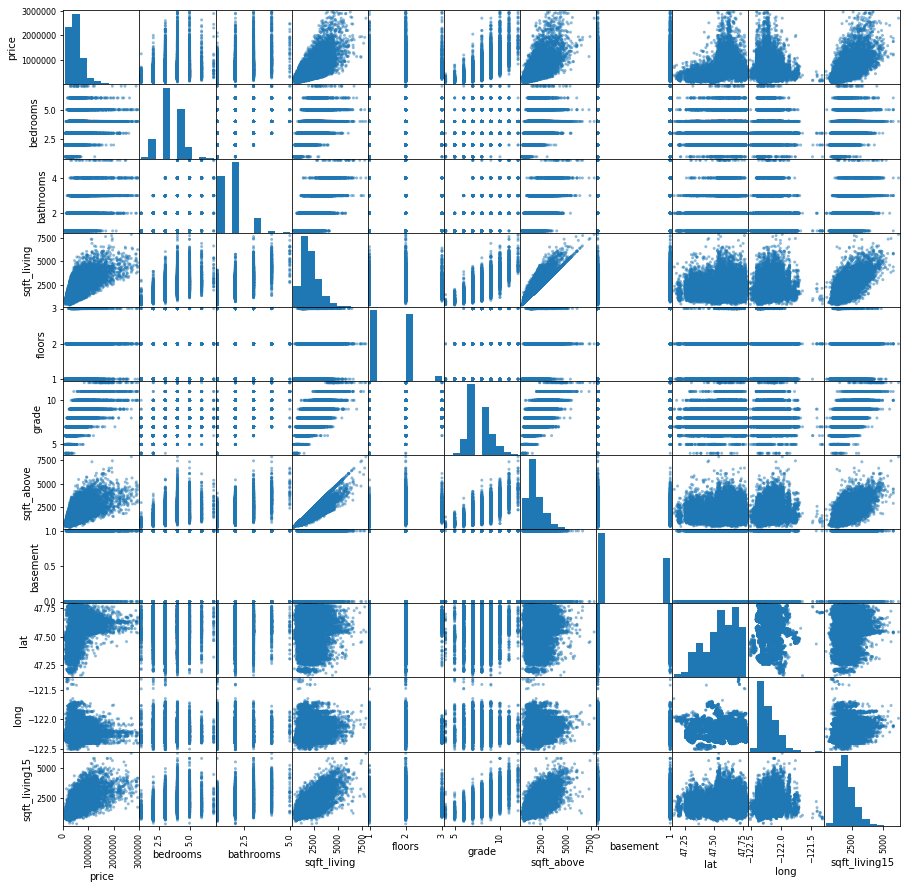

In [32]:
pd.plotting.scatter_matrix(df_subset, figsize=(15,15));

So much nicer! And it appears that half of our remaining variables are categorical in nature, given the vertical/horizontal striations. 
Let's check to see if any of our variables have normally distributed residuals (and thus are likely to have a linear relationship).

## Checking for normality

One of the easiest ways to check a variable for normality of distribution is to do a *Q-Q Plot*. 

bedrooms
bathrooms
sqft_living
grade
sqft_above
sqft_living15
floors
lat
long


PatsyError: Error evaluating factor: NameError: name 'basement' is not defined
    price~basement
          ^^^^^^^^

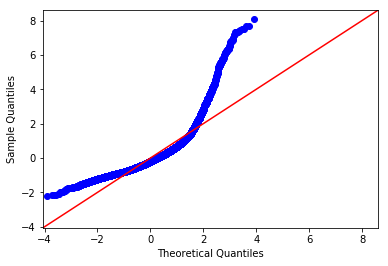

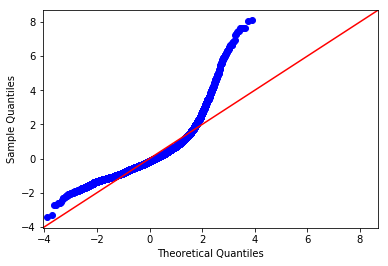

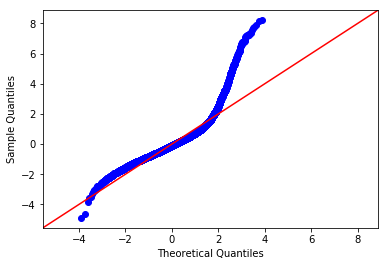

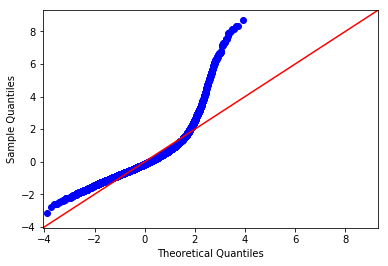

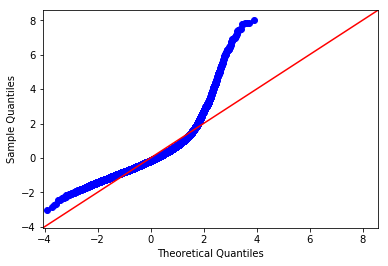

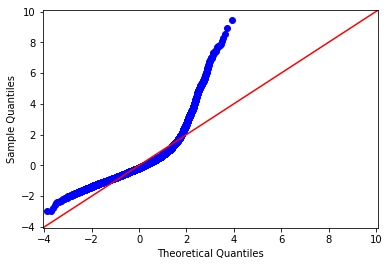

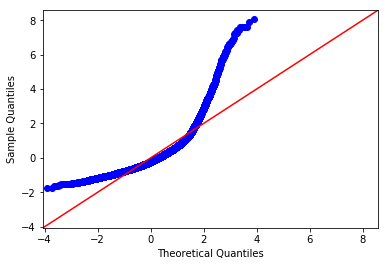

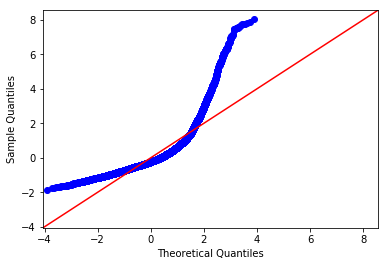

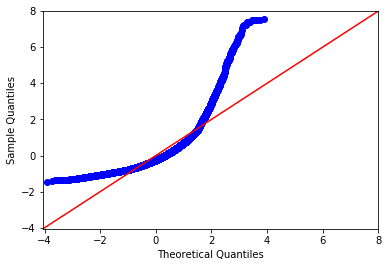

In [189]:
#define the formulas
columns = ['bedrooms','bathrooms','sqft_living','grade','sqft_above',
           'sqft_living15','floors','lat','long','basement','yr_renovated','waterfront']
for col in columns:
    f = str('price~'+col)
    model = smf.ols(formula=f, data=df_subset).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    print(col)
fig.show()

It would appear that none of our variables are normally distributed. These *Q-Q Plots* suggest that the residuals of each variable are heavily right-skewed. This means that we do *not* have any linear relationships.

## *lat* & *long*

But what about the *lat* and *long* data? Let's check out their histograms.

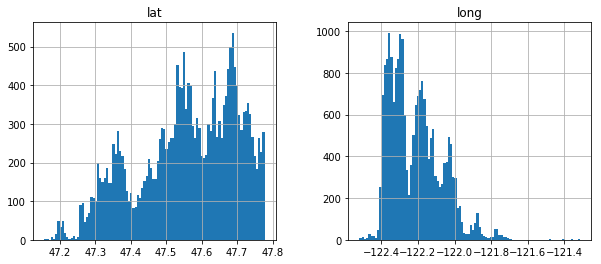

In [190]:
df_subset.hist(column=['lat','long'], bins=100, figsize=(10,4));

#### hexbins

The distribution is somewhat erratic, though there are hints of a more normal distribution underlying the irregularities. Let's use **hexbins** to see what this looks like in 2D.

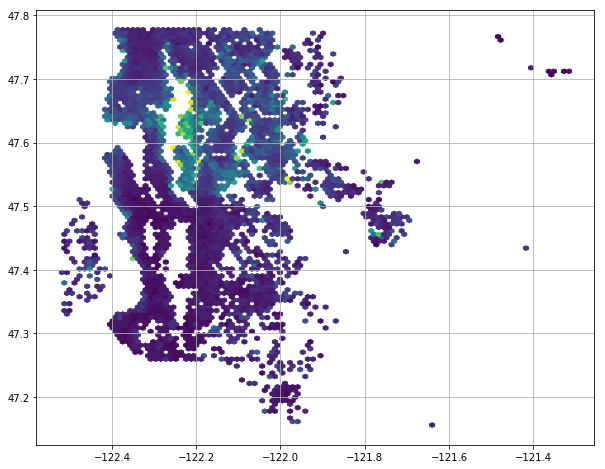

In [191]:
plt.figure(figsize=(10,8))
plt.grid()
plt.hexbin(df_subset.long, df_subset.lat, C=df_subset.price)
plt.show()

A quick look at Seattle on a map ( https://www.google.com/maps/@47.5285014,-122.3593406,10.36z ) shows that there are mountains, islands, and lakes scattered throughout this region. Let's narrow our dataset a bit to get rid of the outlier houses.

How about we cut out anything East of -121.975, anything West of -122.425, and anything South of 47.275. That won't make it perfect, but it should at least eliminate properties in the mountains or ones only accessible by ferries.

In [192]:
indexNames = df_subset[df_subset['long'] > -121.975 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['long'] < -122.425 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['lat'] < 47.275 ].index
df_subset.drop(indexNames , inplace=True)

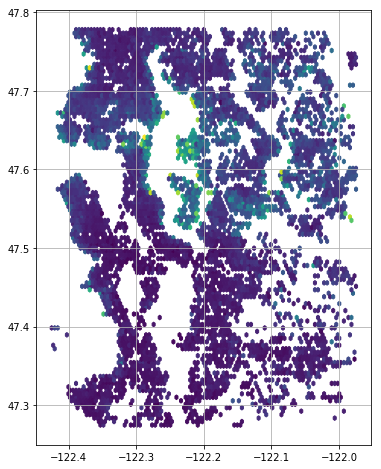

In [193]:
plt.figure(figsize=(6,8))
plt.grid()
plt.hexbin(df_subset.long, df_subset.lat, C=df_subset.price)
plt.show()

This looks better, but there's not much more that we can do with it without better observations. The *waterfront* variable would have been useful if half of the observations weren't missing. As such, we'll just have to refer realtors (or whoever is using this data) to this map to take it into account when looking at pricing of houses.

In terms of our model, however, we can now safely remove *long* from our dataset since price seems to be pretty unrelated to East-West placement. We should hang on to *lat*, though, since there is an obvious correlation between price and North-South location.

In [194]:
# saving our processed GPS data as another DataFrame in case
# we would like to call upon it at some point later
df_subset_gps = df_subset[['price','lat','long']]

In [195]:
#removing 'long' from our dataset
df_subset.drop(['long'], axis=1, inplace=True)

In [196]:
df_subset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
index,,,,,,,,,,,,,,,,,,
0,221900.0,3,1,1180,5650,1,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,1340,5650
1,538000.0,3,2,2570,7242,2,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,1690,7639
2,180000.0,2,1,770,10000,1,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,2720,8062
3,604000.0,4,3,1960,5000,1,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,1360,5000
4,510000.0,3,2,1680,8080,1,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,1800,7503


In [163]:
# We can also make our graphs look prettier now
plt.style.use('seaborn')

# Normalizing, standardizing, scaling, etc.

We still need to tweak *sqft_living*, *sqft_above*, and *sqft_living15* to make them a bit more manageable. Let's look at how correlated these variables might be, and then try a variety of standardization methods.

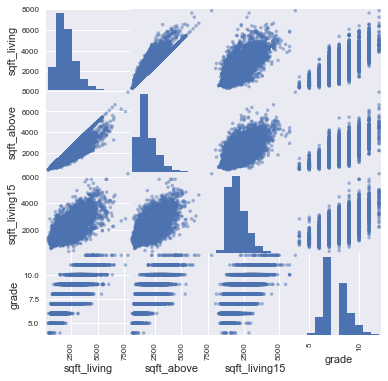

In [164]:
df_sub_cont = df_subset[['sqft_living','sqft_above','sqft_living15', 'grade']]
pd.plotting.scatter_matrix(df_sub_cont,figsize  = [6, 6]);

It would appear that all four of our continuous data variables display multicollinearity (i.e. are related to one another). Additionally, their histograms all appear to be skewed to the left (except *grade*), so perhaps doing a log transformation will make them look more normally distributed.

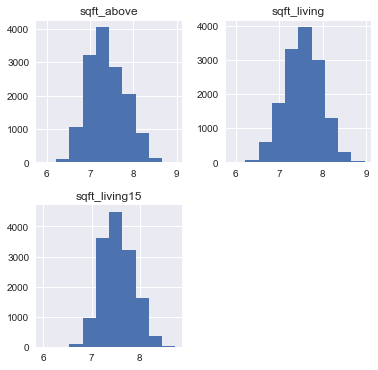

In [165]:
# creating a new DataFrame for log-transformations
df_sub_log = pd.DataFrame([])
df_sub_log['sqft_living'] = np.log(df_sub_cont['sqft_living'])
df_sub_log['sqft_above'] = np.log(df_sub_cont['sqft_above'])
df_sub_log['sqft_living15'] = np.log(df_sub_cont['sqft_living15'])
df_sub_log.hist(figsize  = [6, 6]);

Good. Now let's standardize these variables. Given the normal distribution, perhaps *mean normalization* would be worthwhile.

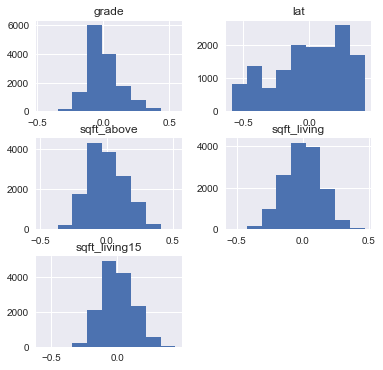

In [166]:
df_sub_log_scaled = pd.DataFrame([])
for column in df_sub_log.columns:
    G = df_sub_log[column]
    df_sub_log_scaled[column] = (G-np.mean(G)) / (max(G)-min(G))

# and doing the same for 'grade' and 'lat'
G = df_subset['grade']
df_sub_log_scaled['grade'] = (G-np.mean(G)) / (max(G)-min(G))
G = df_subset['lat']
df_sub_log_scaled['lat'] = (G-np.mean(G)) / (max(G)-min(G))

df_sub_log_scaled.hist(bins=9, figsize  = [6, 6]);

Now plug this data back into our *df_subset* DataFrame.

In [171]:
for column in df_sub_log_scaled.columns:
    df_subset[column] = df_sub_log_scaled[column]

Now let's build a linear regression model again and see what we have.

In [172]:
y = df_subset['price']
x = df_subset.drop('price', axis=1)
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2074.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:08:18   Log-Likelihood:            -1.9609e+05
No. Observations:               14358   AIC:                         3.922e+05
Df Residuals:                   14346   BIC:                         3.923e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.987e+05   1.15e+04     43.213      0.000    4.76e+05    5.21e+05
bedrooms      -1.079e+04   2629.588     -4.102      0.000   -1.59e+04   -5631.321
bathrooms      3.522e+04   3491.235     10.090      0.000    2.84e+04    4.21e+04
sqft_living    1.595e+05   5.37e+04      2.972      0.003    5.43e+04    2.65e+05
floors        -1.807e+04   3947.073     -4.579      0.000   -2.58e+04   -1.03e+04
waterfront     7.084e+05   2.32e+04     30.529      0.000    6.63e+05    7.54e+05
grade          8.631e+05   2.07e+04     41.755      0.000    8.23e+05    9.04e+05
sqft_above     3.871e+05   5.34e+04      7.254      0.000    2.83e+05    4.92e+05
basement       7.893e+04   7323.241     10.777      0.000    6.46e+04    9.33e+04
yr_renovated     66.5233      4.390     15.154      0.000      57.919      75.128
lat             3.38e+05   6686.158     50.551      0.000    3.25e+05    3.51e+05
sqft_living15  2.784e+05   2.37e+04     11.732      0.000    2.32e+05    3.25e+05
==============================================================================
Omnibus:                     7732.315   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98502.955
Skew:                           2.313   Prob(JB):                         0.00
Kurtosis:                      14.969   Cond. No.                     1.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like we're keeping everything. Wonderful!

# Now to start addressing multicollinearity!

So let's examine our continuous data first for potential collinearity. We can do this easily using a heatmap to display the pairwise correlation scores between the variables.

In [141]:
df_subset.drop('floors', axis=1, inplace=True)

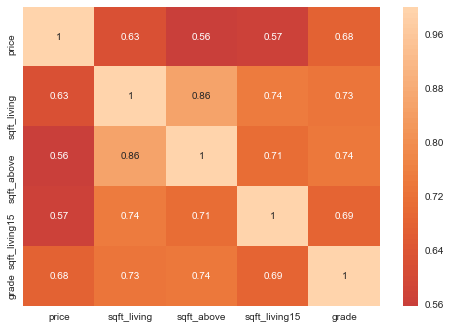

In [52]:
# slice just the variables we want to compare
df_sub_continuous = df_subset[['price','sqft_living','sqft_above','sqft_living15','grade']]

# make a heatmap of the correlation
sns.heatmap(df_sub_continuous.corr(), center=0, annot=True);

It looks like they are all pretty heavily correlated. 

### Building a feature builder

Let's build a function that can take in two variables, a target ('price'), and a dataset to create a feature for our dataset, outputting a column of coefficients to our dataset for the new feature.

In [53]:
# building a feature building function. what fun!
def feature_builder(var_1, var_2, target, dataset):
    """
    Parameters :
    ------------
    var_1 : column name of first potentially correlated variable
    var_2 : column name of second potentially correlated variable
    target : column name of target variable
    dataset : name of pandas DataFrame
    
    
    """    
    weights = np.linspace(0, 1, 10000)
    max_corr = -1
    best_weights = None
    corrs = []
    
    for index, weight in enumerate(weights):
        w1 = weight # get the first weight value
        w2 = 1 - weight # get the second weight value
        vals = w1*dataset[var_1] + w2*dataset[var_2] # create a linear combination of the columns
        corr_coeff = np.abs(np.corrcoef(vals, dataset[target]))[0][1] # get the corrcoeff with the target
        
        # if the corr_coeff is larger than the max, store the weights and change the max
        if corr_coeff > max_corr:
            best_weights = [w1, w2]
            max_corr = corr_coeff
            
        # store the correlation coefficients to a list
        corrs.append(corr_coeff)  
        
    # output the desired weights
    print('weight for [',var_1,'] : weight for [',var_2,']\n', best_weights)
    feat_label = str(var_1+'_'+var_2+'_feature')
    print('feature name : ', feat_label)
    dataset[feat_label] = w1*dataset[var_1] + w2*dataset[var_2]
    pass

In [54]:
# now to run the function on our small dataset
feature_builder('sqft_living','sqft_above','price',df_sub_continuous)

weight for [ sqft_living ] : weight for [ sqft_above ]
 [0.8806880688068807, 0.11931193119311934]
feature name :  sqft_living_sqft_above_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Adding complexity

Since all three of our continuous data variables are pretty correlated, let's got through another iteration of feature building that weighs our first feature against the other remaining continuous data variable *sqft_living15*.

In [55]:
# same as before, but using the name of the new feature as var_1
feature_builder('sqft_living_sqft_above_feature','sqft_living15','price',df_sub_continuous)

weight for [ sqft_living_sqft_above_feature ] : weight for [ sqft_living15 ]
 [0.6247624762476248, 0.3752375237523752]
feature name :  sqft_living_sqft_above_feature_sqft_living15_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
# let's take a look at our new and improved small dataset
df_sub_continuous.head()

,price,sqft_living,sqft_above,sqft_living15,grade,sqft_living_sqft_above_feature,sqft_living_sqft_above_feature_sqft_living15_feature
index,,,,,,,
0,221900.0,-0.153367,-0.100230,-0.121234,-0.081044,-0.153367,-0.153367
1,538000.0,0.101445,0.099200,-0.036694,-0.081044,0.101445,0.101445
2,180000.0,-0.293109,-0.239972,0.136680,-0.206044,-0.293109,-0.293109
3,604000.0,0.012744,-0.138441,-0.115837,-0.081044,0.012744,0.012744
4,510000.0,-0.037719,0.015419,-0.013722,0.043956,-0.037719,-0.037719


#### Evaluating our new features

Now that we've created two potentially useful features, let's see how they might effect our model. To do so, we'll run three OLS models and compare their scores.

In [57]:
y = df_sub_continuous['price']

# original variables, untouched
x1 = df_sub_continuous[['sqft_living','sqft_above','sqft_living15','grade']]

# our first feature with the remaining original variables
x2 = df_sub_continuous[['sqft_living15','sqft_living_sqft_above_feature', 'grade']]

# our second feature with the remaining original variables
x3 = df_sub_continuous[['sqft_living_sqft_above_feature_sqft_living15_feature', 'grade']]



X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)
X3 = sm.add_constant(x3)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     4978.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:19:26   Log-Likelihood:            -2.6899e+05
No. Observations:               19525   AIC:                         5.380e+05
Df Residuals:                   19520   BIC:                         5.380e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.38e+05   1666.253    322.851      0.000    5.35e+05    5.41e+05
sqft_living    7.811e+05    2.6e+04     30.079      0.000     7.3e+05    8.32e+05
sqft_above     -3.64e+05    2.5e+04    -14.578      0.000   -4.13e+05   -3.15e+05
sqft_living15  3.017e+05   2.23e+04     13.556      0.000    2.58e+05    3.45e+05
grade          1.103e+06   1.87e+04     59.090      0.000    1.07e+06    1.14e+06
==============================================================================
Omnibus:                     9132.108   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83657.238
Skew:                           2.035   Prob(JB):                         0.00
Kurtosis:                      12.288   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# modeling and summarizing the second option (midway point)
linreg = sm.OLS(y, X2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     6496.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:19:27   Log-Likelihood:            -2.6910e+05
No. Observations:               19525   AIC:                         5.382e+05
Df Residuals:                   19521   BIC:                         5.382e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            5.38e+05   1675.255    321.116      0.000    5.35e+05    5.41e+05
sqft_living15                   2.641e+05   2.22e+04     11.883      0.000    2.21e+05    3.08e+05
sqft_living_sqft_above_feature  5.486e+05   2.06e+04     26.627      0.000    5.08e+05    5.89e+05
grade                           1.029e+06   1.81e+04     56.976      0.000    9.94e+05    1.06e+06
==============================================================================
Omnibus:                     9015.140   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80469.123
Skew:                           2.012   Prob(JB):                         0.00
Kurtosis:                      12.095   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# modeling and summarizing the third option (fully combined)
linreg = sm.OLS(y, X3).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9604.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:19:31   Log-Likelihood:            -2.6917e+05
No. Observations:               19525   AIC:                         5.383e+05
Df Residuals:                   19522   BIC:                         5.384e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  5.38e+05   1681.260    319.969      0.000    5.35e+05    5.41e+05
sqft_living_sqft_above_feature_sqft_living15_feature  6.673e+05   1.81e+04     36.907      0.000    6.32e+05    7.03e+05
grade                                                 1.095e+06   1.72e+04     63.522      0.000    1.06e+06    1.13e+06
==============================================================================
Omnibus:                     9091.511   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80857.880
Skew:                           2.035   Prob(JB):                         0.00
Kurtosis:                      12.101   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Looking at these summaries in sequence, it seems that the **F-statistic**, **Skew**, **Kurtosis**, and **Cond. No.** have all consistently improved as we progressed through this process, even though the last iteration slightly increased the skew and kurtosis. Our **R-squared** score has fallen a little bit, but that's to be expected when getting rid of multicollinearity. 

### Plugging this back into the larger dataset

In [60]:
df_subset['sqft_living_sqft_above_feature_sqft_living15_feature'] = df_sub_continuous['sqft_living_sqft_above_feature_sqft_living15_feature']

# since we're about to remove columns, let's create a new DataFrame
df_sub_feats = df_subset.drop(['sqft_living','sqft_above','sqft_living15'], axis=1)
df_sub_feats.head()

,price,bedrooms,bathrooms,floors,grade,basement,lat,sqft_living_sqft_above_feature_sqft_living15_feature
index,,,,,,,,
0,221900.0,3,1,1,-0.081044,0,-0.112766,-0.153367
1,538000.0,3,2,2,-0.081044,1,0.304664,0.101445
2,180000.0,2,1,1,-0.206044,0,0.338289,-0.293109
3,604000.0,4,3,1,-0.081044,1,-0.093665,0.012744
4,510000.0,3,2,1,0.043956,0,0.097342,-0.037719


In [61]:
y = df_sub_feats['price']

# original variables, untouched
x = df_sub_feats.drop('price', axis=1)

X = sm.add_constant(x)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     3796.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:19:56   Log-Likelihood:            -2.6747e+05
No. Observations:               19525   AIC:                         5.350e+05
Df Residuals:                   19517   BIC:                         5.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.438e+05   1.01e+04     53.769      0.000    5.24e+05    5.64e+05
bedrooms                                             -1.753e+04   2334.998     -7.508      0.000   -2.21e+04    -1.3e+04
bathrooms                                             3.703e+04   3103.912     11.929      0.000    3.09e+04    4.31e+04
floors                                               -1.595e+04   3287.186     -4.851      0.000   -2.24e+04   -9502.896
grade                                                  9.68e+05   1.73e+04     55.969      0.000    9.34e+05       1e+06
basement                                              3.232e+04   3556.257      9.089      0.000    2.54e+04    3.93e+04
lat                                                   3.343e+05   5968.051     56.021      0.000    3.23e+05    3.46e+05
sqft_living_sqft_above_feature_sqft_living15_feature  6.833e+05   2.24e+04     30.507      0.000    6.39e+05    7.27e+05
==============================================================================
Omnibus:                    10942.644   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135065.188
Skew:                           2.457   Prob(JB):                         0.00
Kurtosis:                      14.911   Cond. No.                         73.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

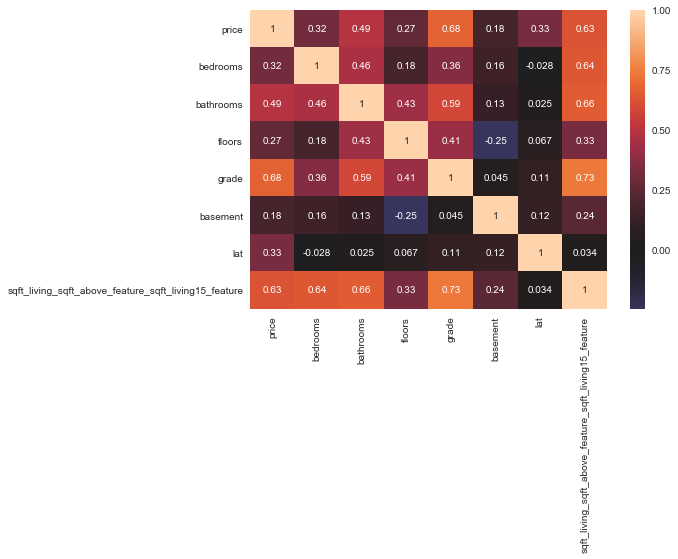

In [62]:
sns.heatmap(df_sub_feats.corr(), center=0, annot=True);

It appears that there is likely some multicollinearity going on between *bedrooms* and *bathrooms*. Let's run them through the same feature-building process that we did with the other collinear variables.

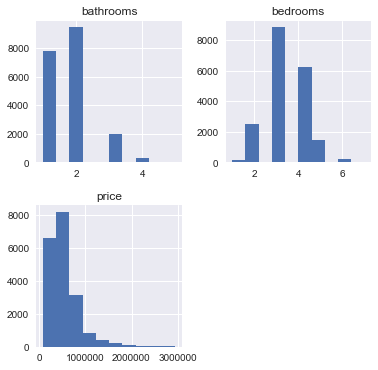

In [63]:
df_sub_feats_bbb = df_sub_feats[['price','bedrooms','bathrooms']]
df_sub_feats_bbb.hist(figsize  = [6, 6]);

It looks like *bathrooms* and *floors* are not normally distributed so let's **min-max scale** them, let's **mean normalize** *bedrooms*, and then we'll see if that makes them better.

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


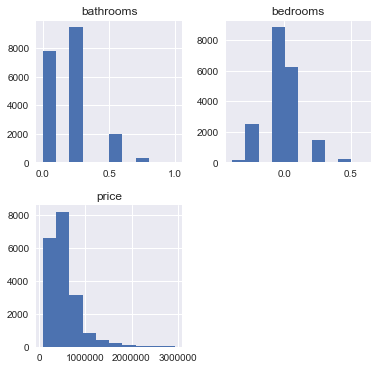

In [64]:
bath = df_sub_feats_bbb.bathrooms
df_sub_feats_bbb.bathrooms = (bath-min(bath))/(max(bath)-min(bath))

beds = df_sub_feats_bbb.bedrooms
df_sub_feats_bbb.bedrooms = (beds-np.mean(beds))/(max(beds)-min(beds))

df_sub_feats_bbb.hist(figsize  = [6, 6]);

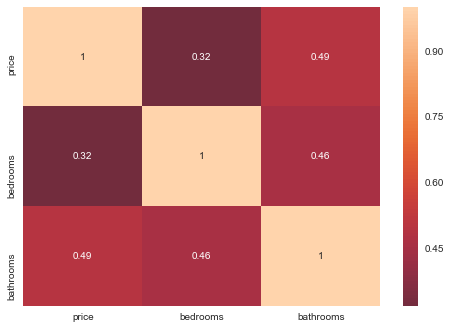

In [65]:
sns.heatmap(df_sub_feats_bbb.corr(), center=0, annot=True);

In [66]:
# now to run the function on our small dataset
feature_builder('bathrooms','bedrooms','price',df_sub_feats_bbb)

weight for [ bathrooms ] : weight for [ bedrooms ]
 [0.7618761876187619, 0.23812381238123814]
feature name :  bathrooms_bedrooms_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
y = df_sub_feats_bbb['price']

x1 = df_sub_feats_bbb[['bedrooms','bathrooms']]
x2 = df_sub_feats_bbb[['bathrooms_bedrooms_feature']]

X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)

linreg = sm.OLS(y, X1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3327.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:21:24   Log-Likelihood:            -2.7299e+05
No. Observations:               19525   AIC:                         5.460e+05
Df Residuals:                   19522   BIC:                         5.460e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.863e+05   3152.883    122.512      0.000     3.8e+05    3.92e+05
bedrooms     2.57e+05   1.56e+04     16.502      0.000    2.27e+05    2.88e+05
bathrooms   8.222e+05    1.3e+04     63.211      0.000    7.97e+05    8.48e+05
==============================================================================
Omnibus:                     8618.612   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61917.137
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      10.773   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
linreg = sm.OLS(y, X2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     6294.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:21:24   Log-Likelihood:            -2.7313e+05
No. Observations:               19525   AIC:                         5.463e+05
Df Residuals:                   19523   BIC:                         5.463e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        3.68e+05   2971.800    123.819      0.000    3.62e+05    3.74e+05
bathrooms_bedrooms_feature  9.214e+05   1.16e+04     79.333      0.000    8.99e+05    9.44e+05
==============================================================================
Omnibus:                     8570.086   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60083.339
Skew:                           1.976   Prob(JB):                         0.00
Kurtosis:                      10.631   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, all of the relevant scores have improved, so let's move our new feature back into our df_sub_feats DataFrame.

In [69]:
df_sub_feats['bathrooms_bedrooms_feature'] = df_sub_feats_bbb['bathrooms_bedrooms_feature']
df_sub_feats.drop(['bedrooms','bathrooms'], axis=1, inplace=True)

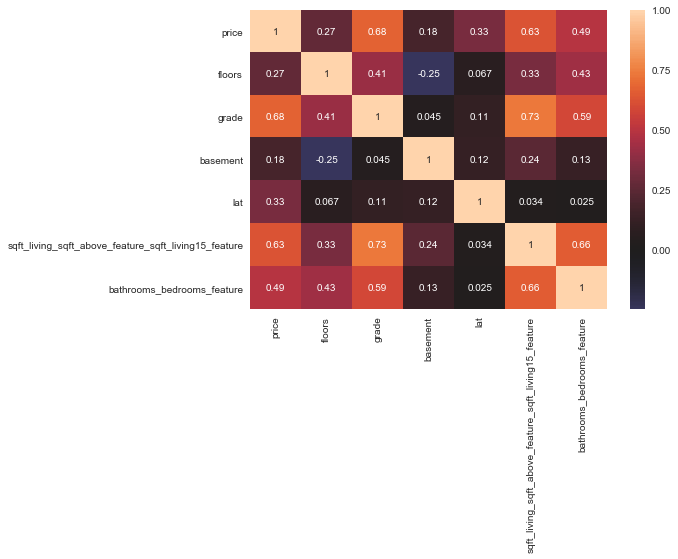

In [70]:
# Re-examing the heatmap again
sns.heatmap(df_sub_feats.corr(), center=0, annot=True);

Well, it looks like that's about as good as it's going to get with these techniques.

# Model Validation

Now that we have our model, we need to test it against our dataset to determine whether or not it is actually predictive. Let's try the **train-test-split** method first, then we'll compare that to **cross-validation with K-folds**.

First, let's see how our overall model is looking in OLS.

In [72]:
y = df_sub_feats['price']
x = df_sub_feats.drop('price', axis=1)
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     4406.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:22:41   Log-Likelihood:            -2.6750e+05
No. Observations:               19525   AIC:                         5.350e+05
Df Residuals:                   19518   BIC:                         5.351e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.222e+05   5747.089     90.864      0.000    5.11e+05    5.33e+05
floors                                               -1.515e+04   3290.150     -4.606      0.000   -2.16e+04   -8705.361
grade                                                 9.966e+05   1.69e+04     58.980      0.000    9.63e+05    1.03e+06
basement                                              3.342e+04   3558.276      9.392      0.000    2.64e+04    4.04e+04
lat                                                   3.356e+05   5973.992     56.183      0.000    3.24e+05    3.47e+05
sqft_living_sqft_above_feature_sqft_living15_feature  5.957e+05   1.91e+04     31.116      0.000    5.58e+05    6.33e+05
bathrooms_bedrooms_feature                            1.371e+05   1.23e+04     11.101      0.000    1.13e+05    1.61e+05
==============================================================================
Omnibus:                    10955.843   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135116.833
Skew:                           2.461   Prob(JB):                         0.00
Kurtosis:                      14.910   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Warning:*** This will take a fair amount of time to run this process

In [73]:
# defining a function that will iterate through a variety of 
# train-test splits, with each proportion being iterated through
# 500 times and averaged out to eliminate any potential bias that 
# randomly poor selection might create
def range_test_sizes(x,y, lower_bound, upper_bound, iterations):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    index = np.linspace(lower_bound, upper_bound, num=iterations, endpoint=True)
    index = np.around(index, 3)
    avg_train_errors = []
    avg_test_errors = []
    for i in index:
        train_errors = []
        test_errors = []
        for iter in range(0,500):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i)
            linreg.fit(x_train, y_train)
            y_hat_train = linreg.predict(x_train)
            y_hat_test = linreg.predict(x_test)
            mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
            mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
            train_errors.append(mse_train)
            test_errors.append(mse_test)
        avg_train_errors.append(np.mean(train_errors))
        avg_test_errors.append(np.mean(test_errors))
    return [index, avg_train_errors, avg_test_errors]

In [74]:
# running the function on our dataset
data = range_test_sizes(x,y,0.5,0.95,50)

In [75]:
print(data)

[array([0.5  , 0.509, 0.518, 0.528, 0.537, 0.546, 0.555, 0.564, 0.573,
       0.583, 0.592, 0.601, 0.61 , 0.619, 0.629, 0.638, 0.647, 0.656,
       0.665, 0.674, 0.684, 0.693, 0.702, 0.711, 0.72 , 0.73 , 0.739,
       0.748, 0.757, 0.766, 0.776, 0.785, 0.794, 0.803, 0.812, 0.821,
       0.831, 0.84 , 0.849, 0.858, 0.867, 0.877, 0.886, 0.895, 0.904,
       0.913, 0.922, 0.932, 0.941, 0.95 ]), [46452159956.757195, 46396618966.949936, 46452877338.86261, 46533709038.91886, 46503859902.944725, 46412375039.36191, 46498716485.02347, 46475043784.67905, 46366144997.43845, 46390074788.26679, 46352225938.17729, 46445940225.831375, 46451922420.23317, 46460371713.23689, 46314113539.73623, 46466718566.909485, 46607349508.906296, 46466339866.58238, 46371007699.19492, 46441052224.79273, 46258897596.96844, 46333390131.317894, 46509418372.84994, 46359885034.60268, 46506528115.51035, 46444775848.25625, 46312933190.99205, 46369232886.48572, 46608999334.95048, 46355173177.65448, 46296973597.01246, 46264334

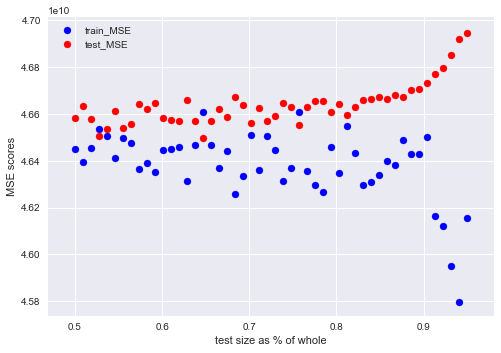

In [76]:
# plotting our results
plt.scatter(data[0], data[1], color='blue', label="train_MSE")
plt.scatter(data[0], data[2], color='red', label="test_MSE")
plt.legend()
plt.xlabel('test size as % of whole')
plt.ylabel('MSE scores')
plt.show()

### Alternatively, let's see what the **K-folds** method of cross-validation tells us.

In [181]:
y = df_sub_feats['price']
x = df_sub_feats.drop('price', axis=1)



In [182]:
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
cv_20_results = cross_val_score(linreg, x, y, cv=20, scoring="neg_mean_squared_error")
cv_20_results

array([-4.44627250e+10, -4.71204569e+10, -4.08940860e+10, -5.68746788e+10,
       -4.16865659e+10, -5.08534714e+10, -5.02725975e+10, -4.36185780e+10,
       -4.01282523e+10, -3.41331147e+10, -4.53885388e+10, -4.52116849e+10,
       -4.43948496e+10, -5.19095374e+10, -4.91952817e+10, -4.76639669e+10,
       -4.88679924e+10, -5.34552282e+10, -5.07685413e+10, -4.62488008e+10])

In [184]:
print('Root Mean Squared Error : ', np.sqrt(np.mean(cv_20_results)*-1))

Root Mean Squared Error :  216003.35052355906


Lovely.

# What does it all mean??

Well, the biggest take away from this process is that we need a **much** better dataset if we are going to attempt to predict the sale price of a home. The problem here is that there are so many additional variables that are not accounted for (local crime rate, access to public transportation/highways, quality of schools, etc.) that there is no way that this model could be used by itself to predict the sale price of a house. In the end, the data is insufficient to be useful beyond very generalized trends.

These include common sense statements like "a bigger house costs more" or "a nicer house (grade) costs more". Ultimately, this dataset by itself is of no use to anyone. My recommendation is to acquire a better dataset that includes a wider range of information about the neighborhoods in which the houses exist. 